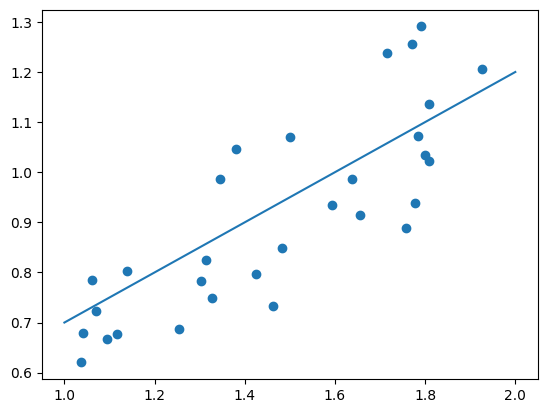

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sequential import Linear, MSELoss, Sequential

model = Sequential([Linear(1, 1)], MSELoss())

def eqn(x):
    return 0.5 * x + 0.2

X = []
y = []

for i in range(30):
    rand = np.random.uniform(1, 2)
    offset = np.random.uniform(-0.4, 0.4)
    outp = eqn(rand + offset)

    X.append(rand)
    y.append(outp)

X = np.array(X).reshape(-1,1)
y = np.array(y)

plt.scatter(X, y)
x_val = np.linspace(1, 2, 100)
plt.plot(x_val, np.apply_along_axis(eqn, 0, x_val))



In [35]:
num_epochs = 1500

for i in range(num_epochs):
    for j in range(20):
        n = np.random.randint(0, X.shape[0])
        predictions = model.forward(X[n:n+1])
        loss = model.loss.forward(y[n:n+1], predictions)
        delta = model.loss.backward()
        model.backward(delta)
        model.sgd_step(0.005)
    if (num_epochs % 10 == 0):
            print(f'loss: {loss}')
    
    

loss: [0.28790608], dLdW: [[1.9001008]]
loss: [0.04851327], dLdW: [[0.66056532]]
loss: [0.061494], dLdW: [[0.64647351]]
loss: [0.04871338], dLdW: [[0.58554704]]
loss: [0.0043562], dLdW: [[0.15031819]]
loss: [0.02146943], dLdW: [[0.30482885]]
loss: [0.00084439], dLdW: [[0.07633306]]
loss: [0.00505648], dLdW: [[-0.25602507]]
loss: [0.00364844], dLdW: [[0.21476005]]
loss: [0.00693148], dLdW: [[-0.22389024]]
loss: [0.01030812], dLdW: [[0.21707075]]
loss: [0.01546419], dLdW: [[0.35465306]]
loss: [0.00932984], dLdW: [[-0.2597523]]
loss: [0.00858187], dLdW: [[0.19806269]]
loss: [0.02387724], dLdW: [[0.34536471]]
loss: [0.06628614], dLdW: [[-0.91172231]]
loss: [0.00252158], dLdW: [[0.13191003]]
loss: [0.03885319], dLdW: [[0.40903456]]
loss: [0.0208806], dLdW: [[0.38336203]]
loss: [0.00343751], dLdW: [[0.19401841]]
loss: [0.00354508], dLdW: [[0.19703074]]
loss: [0.0130833], dLdW: [[0.30345638]]
loss: [3.61830389e-06], dLdW: [[0.00605912]]
loss: [0.08063488], dLdW: [[-0.97480691]]
loss: [0.00865

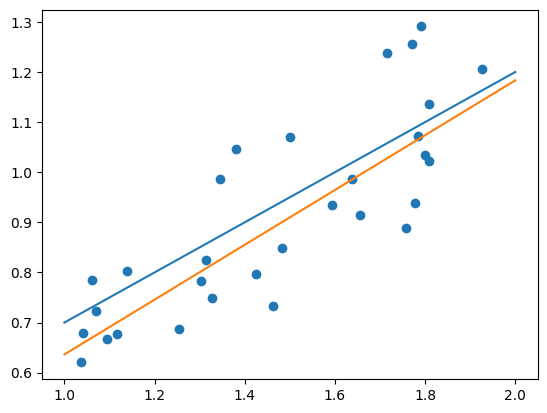

In [36]:
plt.scatter(X, y)
x_val = np.linspace(1, 2, 100)
plt.plot(x_val, np.apply_along_axis(eqn, 0, x_val))

y_pred = model.forward(x_val.reshape(1, -1))
plt.plot(x_val, y_pred[0])